<a href="https://colab.research.google.com/github/flu-s/Python25Study/blob/main/07_03_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC(%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83%2C%EC%BD%9C%EB%B0%B1%2C%EC%A1%B0%EA%B8%B0%EC%A2%85%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
 # 인공 신경망을 구성하는 절차
 # 1. 더미데이터 준비
 # 2. 훈련용, 검증용, 테스트용으로 나눔
 # 3. 심층을 만듦(dense)
 # 4. model에 적용
 # 5. 컴파일 진행(최적화기법 적용 : adam)
 # 6. fit(훈련)
 # 7. evaluate(검증)

In [23]:
# 손실곡선 : fit() 메서드로 모델을 훈련하는동안 훈련과정이 상세하게 출력되어 확인할 수 있음(에포크 횟수, 손실, 정확도)
# 아래쪽에 이 출력 메세지가 나옴
# 코렙 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막라인에 실행결과를 자동으로 출력

# 다시 말해 fit() 메서드는 History라는 클래스 객체를 반환함(훈련과정의 지표, 손실, 정확도등을 내장)
# 이 값을 잘 활용하면 그래프를 그릴 수 있다

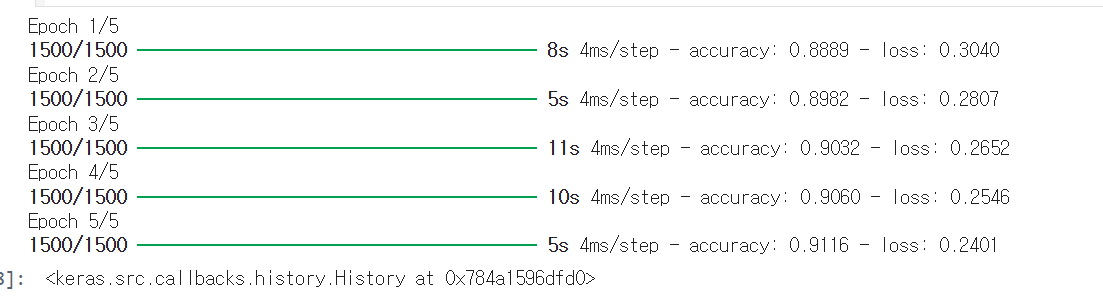

In [24]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
     keras.datasets.fashion_mnist.load_data()
# 엔터 효과 제거용 \ => 한 줄로 긴 문장을 자름

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [25]:
print("훈련데이터 : ")
print(train_scaled.shape, train_target.shape)
print("테스트데이터 :")
print(test_input.shape, test_target.shape)
print("검증 테스트 : ")
print(val_scaled.shape, val_target.shape)

훈련데이터 : 
(48000, 28, 28) (48000,)
테스트데이터 :
(10000, 28, 28) (10000,)
검증 테스트 : 
(12000, 28, 28) (12000,)


In [26]:
# 모델을 만드는 함수를 정의함 (하나의 매개변수를 받아 리턴) .model_fn(dense추가하면 생성)
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))   # 반복적으로 사용되는 입력 층
    model.add(keras.layers.Dense(100, activation='relu'))   # 반복적으로 사용되는 2진분류 층

    # model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함.
    if a_layer:
        model.add(a_layer)                                  # 매개값으로 넘어오는 추가되는 층
    model.add(keras.layers.Dense(10, activation='softmax')) # 반복적으로 사용되는 다중분류 층
    return model

In [27]:
model = model_fn()    # 위에서 만든 메서드를 호출하여 모델에 담음
#       model_fn(매개값이 없으면 그냥 생성, 매개값이 있으면 모델 추가용)
model.summary()       # 모델의 요약정보를 봄

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#                         다중분류                               정확도

In [29]:
# fit()메서드 결과를 history 변수에 담아봄
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)   # 19초 걸림
#                                                         훈련과정 출력을 조절함
#                                 verbose=0 : 훈련과정을 나타내지 않음
#                                 verbose=1 : 기본값, 에포크마다 진행 막대와 함께 손실등의 지표 출력
#                                 verbose=2 : 진행막대빼고 출력

Epoch 1/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8112 - loss: 0.5311
Epoch 2/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8586 - loss: 0.3903
Epoch 3/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8729 - loss: 0.3523
Epoch 4/5
1500/1500 - 4s - 2ms/step - accuracy: 0.8810 - loss: 0.3306
Epoch 5/5
1500/1500 - 4s - 2ms/step - accuracy: 0.8873 - loss: 0.3141


In [30]:
print(history.history.keys())
# 훈련 측정 값이 담겨있는 history 딕셔너리 존재함
# 정확도 accuracy, 손실loss 값이 있다

# 정확도는 compile() 메서드의 metrics 매개변수에 accuracy를 추가했기 때문에 history속성에 포함됐음

dict_keys(['accuracy', 'loss'])


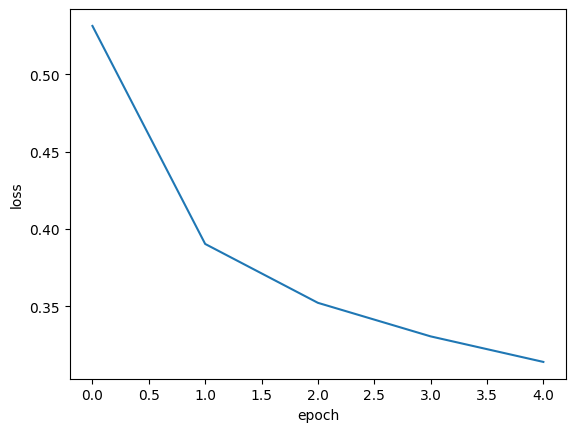

In [33]:
import matplotlib.pyplot as plt
# history속성에 포함된 손실과 정확도는 에포크마다 계산한 값이
# 순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능
plt.plot(history.history['loss']) # 손실율을 차트로 표시
plt.xlabel('epoch')
# 파이썬 인덱스는 0부터 시작함 5개의 에포크가 0~ 4까지 x축에 포현
plt.ylabel('loss') # 손실된 값
plt.show()

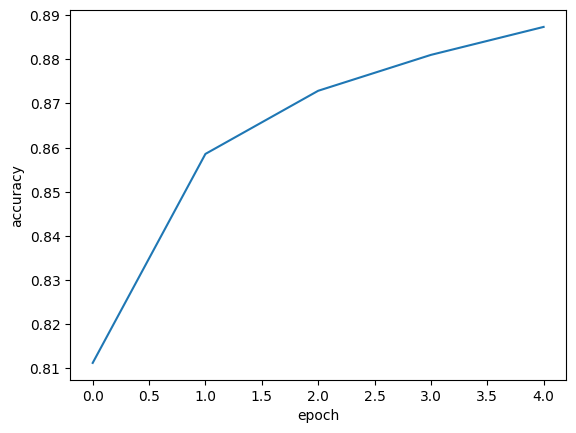

In [34]:
# 이번에는 정확도를 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

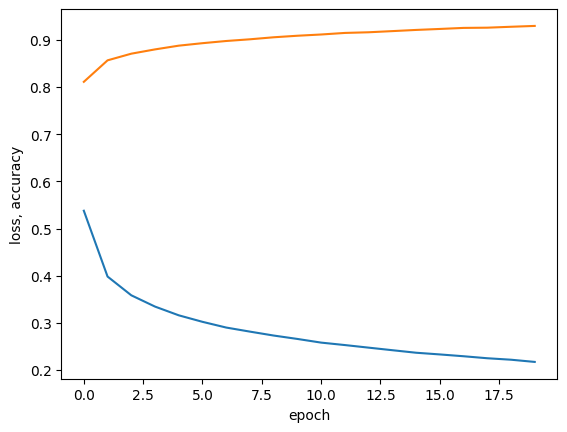

In [36]:
plt.plot(history.history['loss'])         # 손실율
plt.plot(history.history['accuracy'])     # 정확도
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()

In [35]:
# 이번에는 에포크 횟수를 20번으로 늘려보자

model = model_fn()                        # 위에서 만든 메서드로 모델 생성(3개층 = 입력 / 은닉 / 출력)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # 1분정도 걸림

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# 검증 손실 validation_data=(val_scaled, val_target)
# 예전에 확률적 경사 하강법을 사용했을 때 과대/과소 적합과 에포크 사이에 관계 부분이 있었다
# 인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용됨

# 에포크에따른 과대적합, 과소적합을 파악하려면 훈련세트 점수와 검증 세트 점수도 필요함
# 그래서 위에처럼 훈련세트에 손실과 정확도만 그리면 파악이 어려움
# 검증 손실을 이용해서 과대/과소 적합을 응용하겠다

# keypoint = https://wikidocs.net/236194
# 손실을 사용하는 것과 정확도를 사용하는 것의 차이는 ?
# 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수
# 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있는데
# 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋은 방법

In [38]:
model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs = 20, verbose = 1,
                    validation_data=(val_scaled, val_target))
#                   검증 손실을 구하기 위한 매개값 추가됨 2분걸림

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7609 - loss: 0.6817 - val_accuracy: 0.8484 - val_loss: 0.4271
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8512 - loss: 0.4081 - val_accuracy: 0.8586 - val_loss: 0.3910
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8686 - loss: 0.3628 - val_accuracy: 0.8598 - val_loss: 0.3859
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8755 - loss: 0.3391 - val_accuracy: 0.8621 - val_loss: 0.3755
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8849 - loss: 0.3211 - val_accuracy: 0.8603 - val_loss: 0.3916
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8915 - loss: 0.3082 - val_accuracy: 0.8658 - val_loss: 0.3957
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8952 - loss: 0.2964 - val_accuracy: 0.8652 - val_loss: 0.3949
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8999 - loss: 0.2868 

In [39]:
print(history.history.keys())
# 정확도 accuracy, 손실 loss 값이 있다
# 추가로 검증세트, 정확도 val_accuracy, 검증세트 손실 val_loss 나옴

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


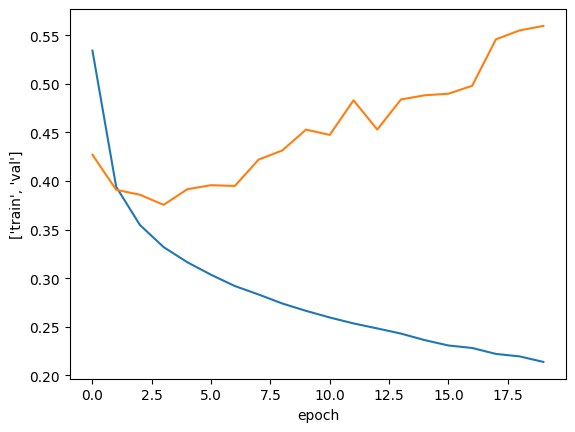

In [42]:
# 과대/과소 적합 문제를 조사하기 위해 훈련손실, 검증손실을 한 그래프에 그려서 비교해보자
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel(['train', 'val'])
plt.show()

# 결과분석 = 초기에 검증 손실이 감소하다 다섯번째 에포크만에 다시 상승
# 훈련손실은 꾸준히 감소하기때문에 과대 적합 모델이 만들어짐
# 검증손실이 상승하는 시점을 가능한한 늦추면 세트에 대한 손실이 줄어들고
# 검증 세트에 대한 정확도가 증가할 것 같다

# 과대 적합을 막기위한 방법으로 예전에 사용했던 규제방식대신에 신경망에 특화된 규제방법(드롭아웃)을 나중에 해보자

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


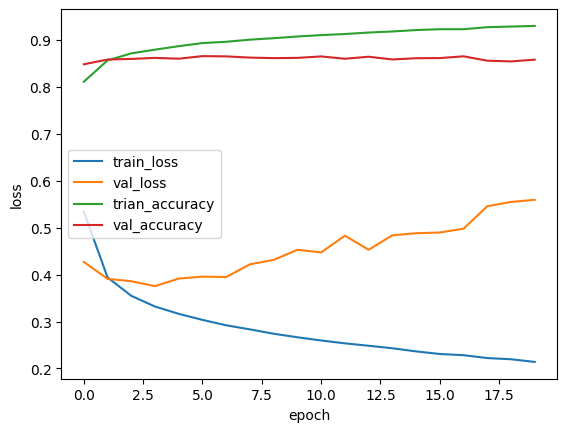

In [46]:
# 지금은 옵티마이져(최적화) 하이퍼파라미터를 자동 조절하여 과대 적합을 완화시켜본다
# RMSprop 옵티마이져는 많은 문제에서도 잘 동작한다 -> 다른 방법으로는 Adagrad, Adam등이 있음
model = model_fn()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'trian_accuracy', 'val_accuracy'])
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


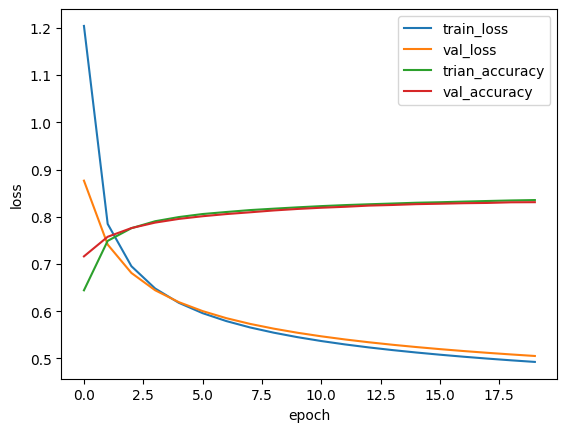

In [48]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()          # Adagrad 기법으로 최적화 후 차트 보기
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'trian_accuracy', 'val_accuracy'])
plt.show()

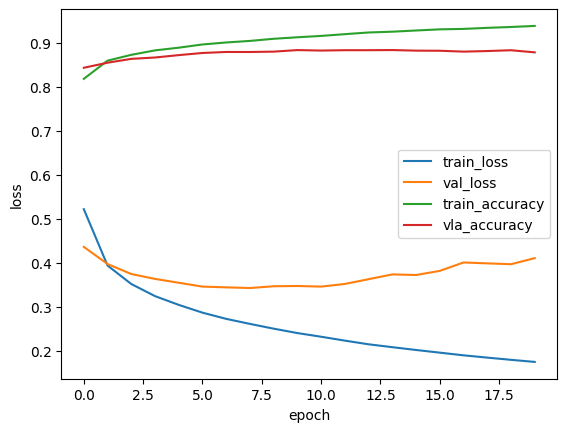

In [52]:
model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
# 2분 걸림
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'vla_accuracy'])
plt.show()
# 3가지 최적화 기법을 사용해보니 adam이 안정적으로 보인다
# 대신 과대적합을 막기위한 기법이 필요해보임

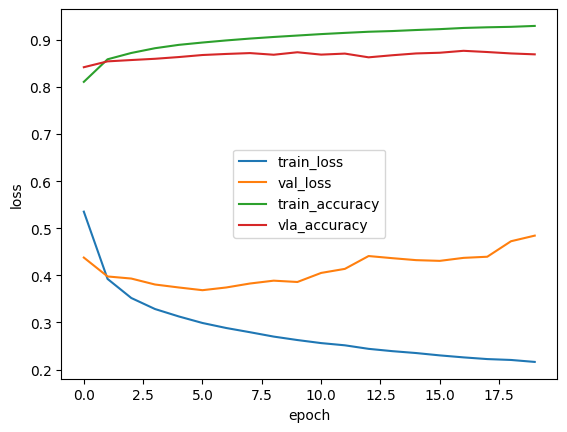

In [54]:
model = model_fn()

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
# 1분 걸림
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'vla_accuracy'])
plt.show()

In [50]:
# 드롭 아웃 (Dropout)은 딥러닝의 기초가되는 제프리 힌턴이 소개 하였다.
# 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런 출력을 0으로 만듬) 과대 적합을 막음

# 어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2 출력이 없음
# 다른 샘플을 처리 할 때는 은닉층의 첫번째 뉴런이 드롭아웃되어 h1 출력이 없음
# 뉴런은 랜덤하게 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할 것임

# 드롭 아웃이 왜 과대 적합을 막을 수 있을지 생각을 해보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면
# 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것

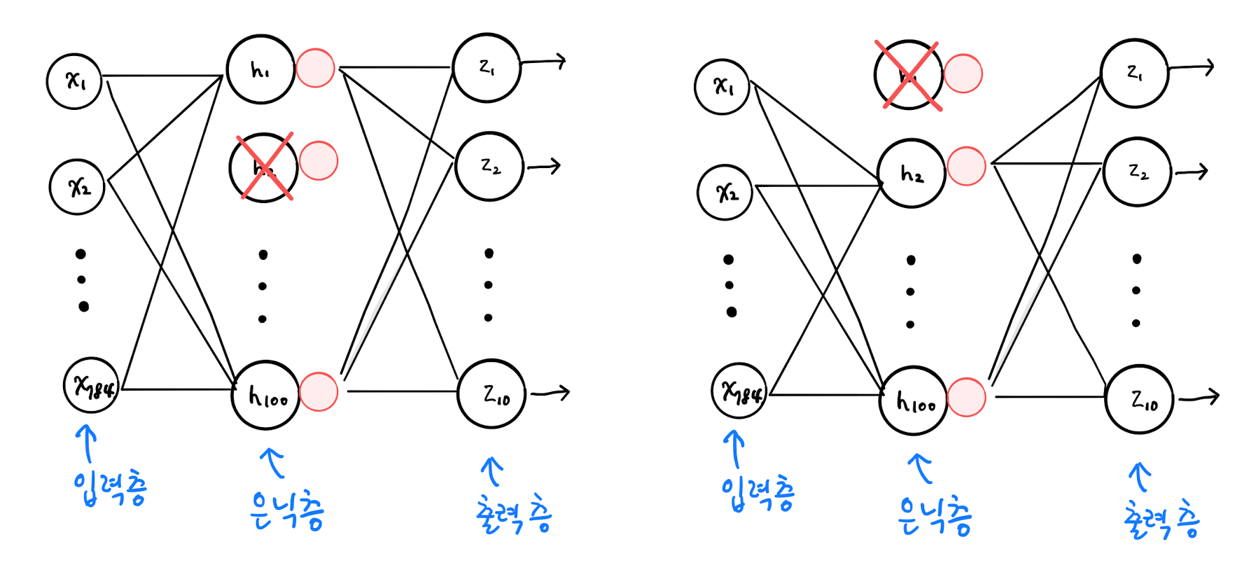

In [56]:
# 또 다른 분석
# 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면
# 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것처럼 상상하게 됨
# 앙상블 = 다 좋은 예측을 만들기 위해 여러개의 모델을 훈련하는 머신러닝 알고리즘
#          과대적합을 막아주는 좋은 기법

# 케라스에서 드롭아웃을 keras.layers.Dropout로 제공함
# 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듬
# 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없음

# model_fn 함수에 드롭 아웃 객체를 전달하여 층을 추가함
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도 드롭 아웃

model.summary() # 요약 확인
# 은닉층 뒤에 추가된 드롭아웃 층(3번째 값)은 훈련되는 모델 파라미터가 없음
# 입력과 출력의 크기가 같음
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

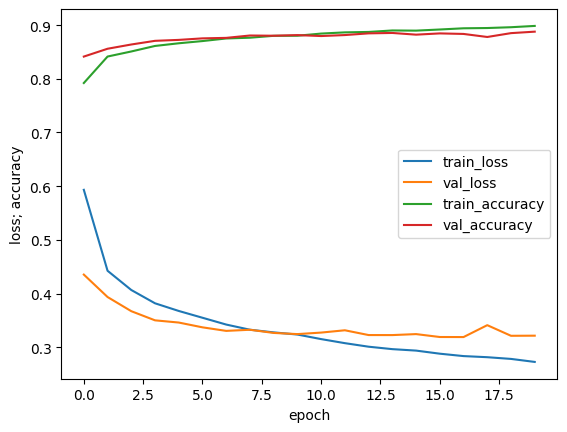

In [57]:
# 주의사항 = 훈련이 끝난 뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않는다
# 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행됨
# 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지 않음

# 훈련손실과 검증손실의 그래프를 그려보자
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss; accuracy')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()
# 과대적합이 확실히 죽어들었음 10번재 에포크의 검증 손실 감소가 멈추지만 크게 상승하지 않음
# 20번 에포크를 실행해서 결국 과대 적합이 되었음 -> 10번만 해볼까 ? => 조기종료에서 해보자

In [65]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

model.save('model-whole-ep10.keras')      # 모델 저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights()메서드가 있다
# 텐서플로의 체크포인트 포멧으로 저장하지만 https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5 포멧으로 저장함 https://geunuk.tistory.com/466

model.save_weights('model-ep10.weights.h5')   # HDF5형식으로도 저장됨 (폴더에서 확인)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
# 이제는 저장한 모델을 불러와 테스트를 진행해보자
!ls -al model*

-rw-r--r-- 1 root root 976600 Nov 13 03:41 model-ep10.weights.h5
-rw-r--r-- 1 root root 979412 Nov 13 03:41 model-whole-ep10.keras


In [68]:
# 실험 1
# 훈련하지 않은 새로운 모델을 만들고 model-ep10.weights.h5파일에서 훈련된 모델 파라미터를 읽어서 사용

# model_fn() 위와 동일한 모델
model = model_fn(keras.layers.Dropout(0.3))   # 훈련하지 않은 새로운 모델

model.load_weights('model-ep10.weights.h5')   # 이전에 저장했던 모델 파라이터를 로딩
# 이 때 사용하는 메서드는 save-weight()와 쌍을 이루는 load_weight() 메서드
# 주의사항 = load_weights() 메서드를 사용하려면  save_weight() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야함

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# 모델의 검증 정확도를 확인해보자
import numpy as np

# predict() 메서드는 사이킷런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환 (다중분류)

# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플의 수는 12,000개이기 때문에
# predict() 메서드는(12000, 10) 크기의 배열을 반환
# 10개의 확률 중 가장 큰 값의 인덱스를 골라(.argmax) 타깃 레이블과 비교하여 정확도를 계산해보자
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

# axis = -1 배열의 마지막 차원을 따라 최댓값을 고름
# 검증세트는 2차원 배열이기 때문에 마지막 차원 = 1
# 예를 들어 아래 그림처럼 5x3 배열에 axis=1로 한 값과 axis=0으로 한 값의 인덱스를 반환함

# argmax()로 고른 인덱스(val_labels)와 타겟(val_target)을 비교하여 같으면 1 / 다르면 0
# 이를 평균으로 출력해봄(정확도)
print(np.mean(val_labels == val_target)) # % 88.10평균

# axis = 1이면 열을 따라 각 행의 최대값의 인덱스 선택
# axis = 0이면 행을 따라 각 열의 최대값의 인덱스 선택
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타겟(val_target) 비교
#  => 두 배열에서 각 위치의 값이 같으면 1 / 다르면 0 (평균하면 정확도가 됨)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.8810833333333333


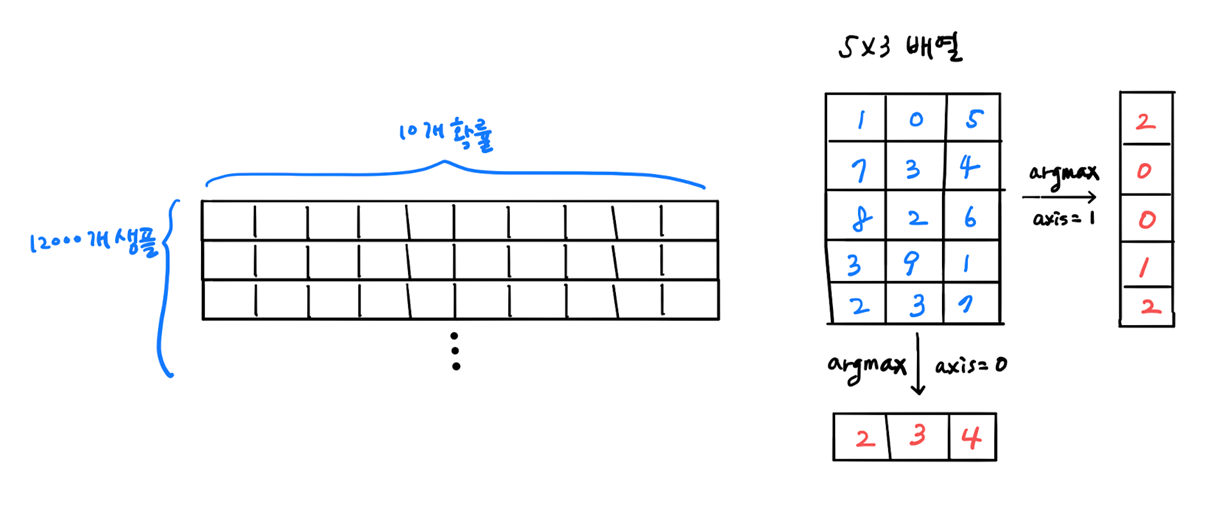

In [71]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해봄
model = keras.models.load_model('model-whole-ep10.keras')   # load_model()에 저장된 케라스 파일 읽기

model.evaluate(val_scaled, val_target)                      # 같은 모델을 불러들였기 때문에 위와 정확도가 같음

# 현상태 분석 = 20번의 에포크동안 모델을 훈련하여 검증 점수가 상승하는 지점 확인
# 모델을 과대적합되지 않은 에포크만큼 다시 훈련함
# 모델을 두번씩 훈련하지 않고 한 번에 끝내는 방법을 연구해보자 -> 케라스 콜백
# https://ltlkodae.tistory.com/13 케라스 모델을 저장하는 방법 2가지 분석

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8830 - loss: 0.3275


[0.32760950922966003, 0.8810833096504211]

In [77]:
# 실험 2
# 아예 파일로 새로운 모델을 만들고 바로 사용
# 추가적으로 콜백이라는 것을 활용해보자
# 콜백 = 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, 케라스, 콜백 패키지에 있다
# fit() 메서드의 callback매개변수에 리스트로 전달하여 사용
# 지금 우리가 사용할 콜백은 ModelCheckpoint 콜백으로 에포크마다 모델 저장
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=1,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])
# 모델 훈련후 best-model.keras에 최상의 검증 점수를 낸 모델이 저장됨

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7343 - loss: 0.7702 - val_accuracy: 0.8397 - val_loss: 0.4340
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8366 - loss: 0.4548 - val_accuracy: 0.8599 - val_loss: 0.3846
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8502 - loss: 0.4092 - val_accuracy: 0.8668 - val_loss: 0.3654
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8592 - loss: 0.3902 - val_accuracy: 0.8746 - val_loss: 0.3479
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8643 - loss: 0.3716 - val_accuracy: 0.8772 - val_loss: 0.3421
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8693 - loss: 0.3552 - val_accuracy: 0.8742 - val_loss: 0.3461
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8713 - loss: 0.3490 - val_accuracy: 0.8778 - val_loss: 0.3335
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8761 - loss: 0.338

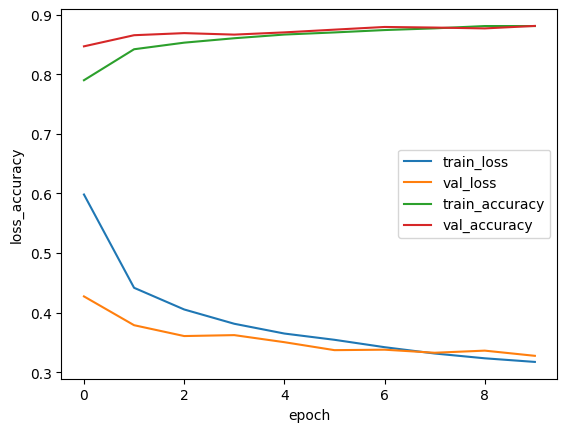

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8837 - loss: 0.3304


[0.333400696516037, 0.8824999928474426]

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss_accuracy')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target)  # 검증세트의 성능 확인 (33.34%, 88.24%) 에포크 9번
# 결론 = 20번을 다 돌리고 좋은 점수가 나온 9번째 에포크 저장

In [76]:
# keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자도응로 저장해주었음
# 여전히 20번의 에포크동안 훈련을 함
# 사실 검증 점수가 상승하기 시작하면 그 이 후에는 과대 적합이 더 커지기 때문에 훈련을 계속할 필요가 없음
# 이 때 훈련을 종료하면 자원과 시간을 아낄 수 있음 => 조기종료(early stopping)

# 조기 종료는 딥러닝 분야에 많이 사용하는 기법
# 에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기도 함 - 규제 방법 중 하나

In [82]:
# 케라스에는 조기종료를 위한 EarltStopping 콜백을 제공함
# 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정
# patience = 2 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지 (patience = 인내심)
# restore_best_weights=True = > 가장 낮은 검증 손실을 낸 모델 파라미터로 돌림

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
# 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증손실이 다시 상승할 때 훈련을 중지할 수 있음

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)  # 얼리

# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7299 - loss: 0.7689 - val_accuracy: 0.8487 - val_loss: 0.4207
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8380 - loss: 0.4515 - val_accuracy: 0.8587 - val_loss: 0.3864
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8511 - loss: 0.4121 - val_accuracy: 0.8634 - val_loss: 0.3705
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8563 - loss: 0.3894 - val_accuracy: 0.8693 - val_loss: 0.3549
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8628 - loss: 0.3709 - val_accuracy: 0.8694 - val_loss: 0.3546
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8676 - loss: 0.3552 - val_accuracy: 0.8739 - val_loss: 0.3449
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8740 - loss: 0.3423 - val_accuracy: 0.8791 - val_loss: 0.3315
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8762 - loss: 0.3326 - 

In [83]:
print(early_stopping_cb.stopped_epoch) # 에포크의 조기종료 시점

10


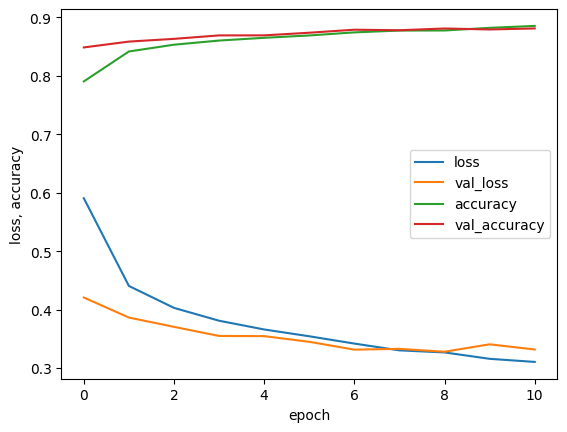

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8845 - loss: 0.3236


[0.3278959095478058, 0.8811666369438171]

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (32.78%, 88.11%) 에포크 10번
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함꼐 사용하면 최상의 모델을 자동으로 저장해 준다는 것을 명심